In [1]:
#Pkg.add("Interpolations")
using Plots
using Polynomials
using DataFrames
using Statistics
using Interpolations

In [2]:
function lagrange(x1, y1, x) 
    result = 0
    for k = 1:size(x1,1)
        d = 1
        m = 1
        for i = 1:size(x1,1)
            if(i != k)
                d = d * (x - x1[i])
                m = m * (x1[k] - x1[i])
            end
        end
        result += (d/m * y1[k])
    end
    result
end

lagrange (generic function with 1 method)

In [3]:
function divideddiff(x, y)
    n = length(x)
    d = deepcopy(y)
    for i=2:n
        for j=1:i-1
            d[i] = (d[j] - d[i])/(x[j] - x[i])
        end
    end
    d
end

divideddiff (generic function with 1 method)

In [4]:
function newton(x, d, x1)
    n = length(d)
    result = d[n]
    for i=n-1:-1:1
        result = result*(x1 - x[i]) + d[i]
    end
    result
end

newton (generic function with 1 method)

In [5]:
x =  1:1:10
y = [rand() for x1 in x]
xsf = 1:0.01:10

L= [lagrange(x, y, x1) for x1 in xsf]
d = divideddiff(x, y)
N = [newton(x, d, x1) for x1 in xsf]

fit1 = polyfit(x,y)
C = [fit1(x1) for x1 in xsf]
x

1:1:10

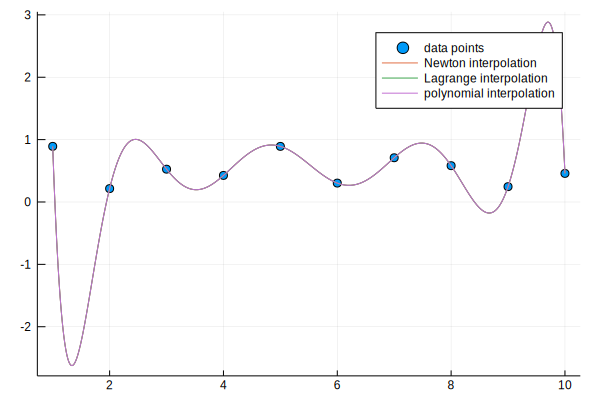

In [6]:
scatter(x, y, label="data points")
plot!(xsf, N, label="Newton interpolation")
plot!(xsf, L, label="Lagrange interpolation")
plot!(xsf, C, label="polynomial interpolation")

In [ ]:
df = DataFrame(size = Int64[], timeL = Float64[], timeN = Float64[], timeP = Float64[])
for i = 100:100:400
    for p = 1:11
        
        x =  1:1:i
        y = [rand() for x1 in x]
        xsf = 1:0.01:i

        timeL = @elapsed [lagrange(x, y, x1) for x1 in xsf]

        time2N = @elapsed divideddiff(x, y)
        d = divideddiff(x, y)
        timeN = @elapsed [newton(x, d, x1) for x1 in xsf]
        
        fit1 = polyfit(x,y)
        timeP = @elapsed [fit1(x1) for x1 in xsf]
        if p>1
            push!(df, [i, timeL, timeN+time2N, timeP])
        end
    end
end
df

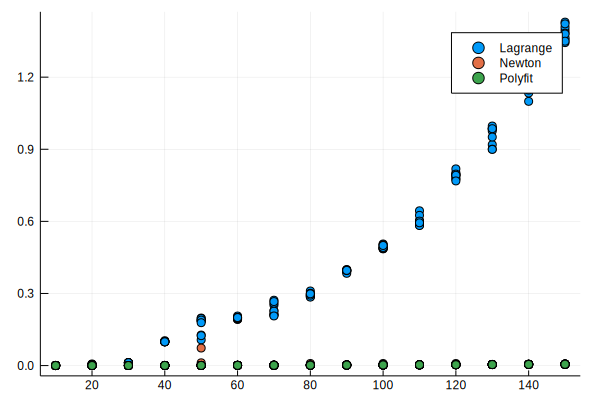

In [23]:
scatter(df[:size], df[:timeL], label = "Lagrange")
scatter!(df[:size], df[:timeN], label = "Newton")
scatter!(df[:size], df[:timeP], label = "Polyfit")

In [24]:
df2=by(df, [:size]) do subGroup
          DataFrame(meanL = mean(subGroup[:timeL]), stdL = std(subGroup[:timeL]),
            meanN = mean(subGroup[:timeN]), stdN = std(subGroup[:timeN]),
            meanP = mean(subGroup[:timeP]), stdP = std(subGroup[:timeP])) 
        end

,size,meanL,stdL,meanN,stdN,meanP,stdP
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,0.000567944,2.65192e-5,8.80105e-5,2.15905e-5,3.04801e-5,7.51466e-6
2,20,0.00406488,0.000958415,0.000233502,0.000141235,0.000100841,1.27192e-5
3,30,0.0119212,0.000141259,0.000359672,2.12678e-5,0.000212661,1.8386e-5
4,40,0.0995966,0.00141909,0.000610744,2.65149e-5,0.000380312,1.22827e-5
5,50,0.167972,0.0342913,0.0091585,0.0226515,0.000605824,2.03472e-5
6,60,0.197912,0.00414476,0.00106334,0.000102524,0.000887835,2.12263e-5
7,70,0.2346,0.0253724,0.00160033,0.000134466,0.00119865,1.97472e-5
8,80,0.294673,0.00755732,0.00261203,0.00217623,0.00158122,3.27038e-5
9,90,0.394321,0.00438162,0.00241556,0.000181885,0.00201858,4.94745e-5


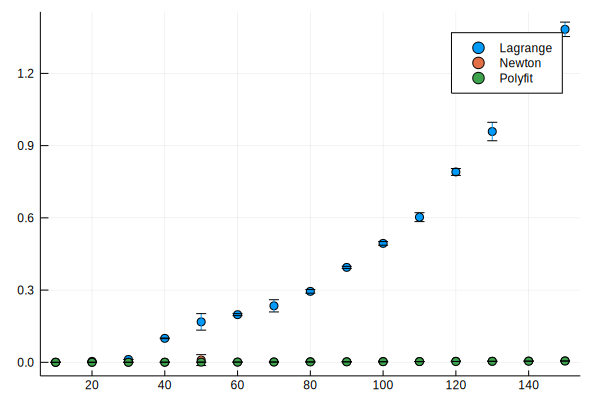

In [25]:
scatter(df2[:size], df2[:meanL], yerr=df2[:stdL], label = "Lagrange")
scatter!(df2[:size], df2[:meanN], yerr=df2[:stdN], label = "Newton")
scatter!(df2[:size], df2[:meanP], yerr=df2[:stdP], label = "Polyfit")

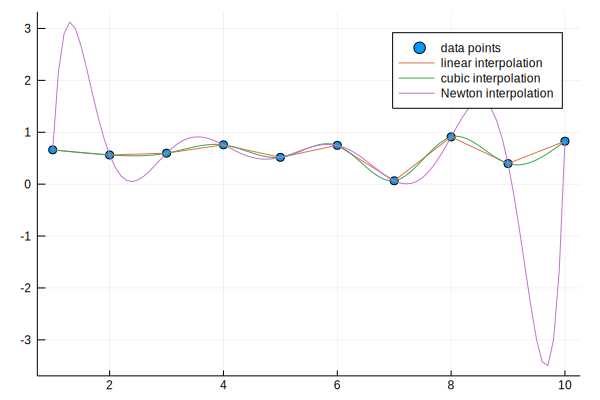

In [12]:
x =  1:1:10
xsf=1:0.1:10
y = [rand() for x1 in x]
interp_linear = LinearInterpolation(x, y)
linear = [interp_linear(x1) for x1 in xsf]
scatter(x, y, label="data points")
plot!(xsf, linear, label="linear interpolation")
interp_cubic = CubicSplineInterpolation(x, y)
cubic =[interp_cubic(x1) for x1 in xsf]
plot!(xsf, cubic, label="cubic interpolation")
d = divideddiff(x, y)
N = [newton(x, d, x1) for x1 in xsf]
plot!(xsf, N, label="Newton interpolation")

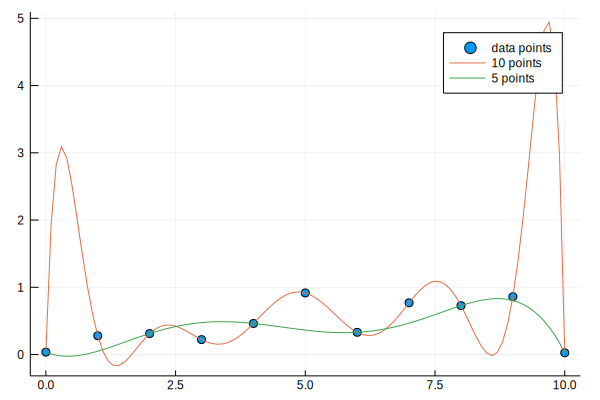

In [28]:
x = 0:1:10
y = [rand() for xs in x]
xsf = 0:0.1:10
scatter(x,y, label="data points")
fit1=polyfit(x, y)
fitted1=[fit1(xs) for xs in xsf]
plot!(xsf, fitted1, label="10 points")

x1 = 0:2:10
y1 = [y[xs+1]  for xs in x1]
fit2=polyfit(x1, y1)
fitted2=[fit2(xs) for xs in xsf]
plot!(xsf, fitted2, label = "5 points")